### Worked with Sabrina Carlos

## Q1: What information do you have?
The direct headers:
1. What are your reasons for taking course?
2. Are you a transfer student?
3. What year of study are you in?
4. Are you familiar with Python?
5. Are you familiar with Github?
6. Are you familiar with SQL?
7. Are you familiar with JupyterLab?
8. Are you familiar with Anaconda?
9. Which of the following courses have you taken?
10. Other DS related courses you've taken
11. How familiar are you with different stastical tests
12. How many classes are you taking this quarter?
13. How many of your classes this quarter have a lab (including CS 105)
14. How old are you?
15. How many tech electives have you taken at UCR?
16. What is your first programming language?
17. What is your preferred go to programming language?
18. When did you begin learning how to program?
19. How did you begin programming
20. Do you like playing sports / working out?
21. How many days a week do you work out?
22. What is your gender?
23. Do you like listening to music?
24. What type of music do you prefer listening to?
25. Do you like reading
26. What genre of books do you like to read (if you had to)

Descriptive:
- student information: year of study, courses taken, demographic, etc
- skills: familiarity with certain programming languages, first programming language, most comfortable programming language, software familiarity, etc
- pasttimes: music, exercise, books

## Q2: What would you like to know about the class?

Questions:
1. correlation between first programming language and how they started
2. correlation between liking working out and the amount of times a week someone works out
3. correlation between familiarity with python and anaconda
4. average familiarity with statistical tests
5. most common preferred music type
6. what are the mean, median and mode on how many technical electives are taken

## Q3: Explore the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2

# read fie as a dataframe
df = pd.read_csv('CS105_SurveyUpdated - Sheet1.csv', sep=',', error_bad_lines=False)

# make a copy to modify
df2 = df.copy()

# drop first two lines that wont be used at all
df2 = df2.drop([0,1])
df2 = df2.drop(columns=['Unnamed: 0', '1. What are your reasons\nfor taking course?', '9. Which of the following courses have you taken?','Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', "10. Other DS related courses \nyou've taken"])

# clean up data fills
df2['16. What is your first \nprogramming language?'] = df2['16. What is your first \nprogramming language?'].replace(['C++ '],'C++')
df2['16. What is your first \nprogramming language?'] = df2['16. What is your first \nprogramming language?'].replace(['Jav '],'Java')
df2['16. What is your first \nprogramming language?'] = df2['16. What is your first \nprogramming language?'].replace(['Java '],'Java')
df2['19. How did you begin \nprogramming'] = df2['19. How did you begin \nprogramming'].replace(['High School course'],'High school course')
df2['19. How did you begin \nprogramming'] = df2['19. How did you begin \nprogramming'].replace(['Online Tutorial'],'Online Tutorials')
df2['19. How did you begin \nprogramming'] = df2['19. How did you begin \nprogramming'].replace(['Inrtoductory course in college'],'Introductory course in college')
df2['19. How did you begin \nprogramming'] = df2['19. How did you begin \nprogramming'].replace(['Intoductory course in college'],'Introductory course in college')
df2['19. How did you begin \nprogramming'] = df2['19. How did you begin \nprogramming'].replace(['Intrductory course in college'],'Introductory course in college')
df2['19. How did you begin \nprogramming'] = df2['19. How did you begin \nprogramming'].replace(['Introducory course in college'],'Introductory course in college')
df2['20. Do you like playing \nsports / working out?'] = df2['20. Do you like playing \nsports / working out?'].replace(['Yes '],'Yes')
df2['20. Do you like playing \nsports / working out?'] = df2['20. Do you like playing \nsports / working out?'].replace(['No '],'No')
df2['23. Do you like \nlistening to music?'] = df2['23. Do you like \nlistening to music?'].replace(['Yes '],'Yes')
df2['24. What type of music do \nyou prefer listening to?'] = df2['24. What type of music do \nyou prefer listening to?'].replace(['Edm '],'Edm')
df2['24. What type of music do \nyou prefer listening to?'] = df2['24. What type of music do \nyou prefer listening to?'].replace(['Hiphop '],'Hiphop')
df2['24. What type of music do \nyou prefer listening to?'] = df2['24. What type of music do \nyou prefer listening to?'].replace(['Rock '],'Rock')

# assume that any student that did not answer is a traditional student
df2[['2. Are you a \ntransfer student?']] = df2[['2. Are you a \ntransfer student?']].fillna(value=1)

# fill with averages
#for i in range(1, 5):
df2.iloc[:, 1].fillna(value=df2.iloc[:, 1].mean(), inplace=True)
    
# fill with modes
for i in range(2, 23):
    df2.iloc[:, i].fillna(df2.iloc[:, i].mode()[0], inplace=True)
    
# convert to integer
for i in range(0, 12):
    df2.iloc[:, i] = df2.iloc[:, i].astype('int64')
df2.iloc[:, 17] = df2.iloc[:, 17].astype('int64')

df2.dtypes

2. Are you a \ntransfer student?                                              int64
3. What year of study \nare you in?                                           int64
4. Are you familiar \nwith Python?                                            int64
5. Are you familiar\nwith Github?                                             int64
6. Are you familiar\nwith SQL?                                                int64
7. Are you familiar \nwith JupyterLab?                                        int64
8. Are you familiar\nwith Anaconda?                                           int64
11. How familiar are you\n with different stastical tests                     int64
12. How many classes are\n you taking this quarter?                           int64
13. How many of your classes this \nquarter have a lab (including CS 105)     int64
14. How old are you?                                                          int64
15. How many tech electives\nhave you taken at UCR?                         

### 1. correlation between first programming language and how they started
we are finding the raw data of how students began programming and their first programming language
we will later determine if there is a correlation between the two

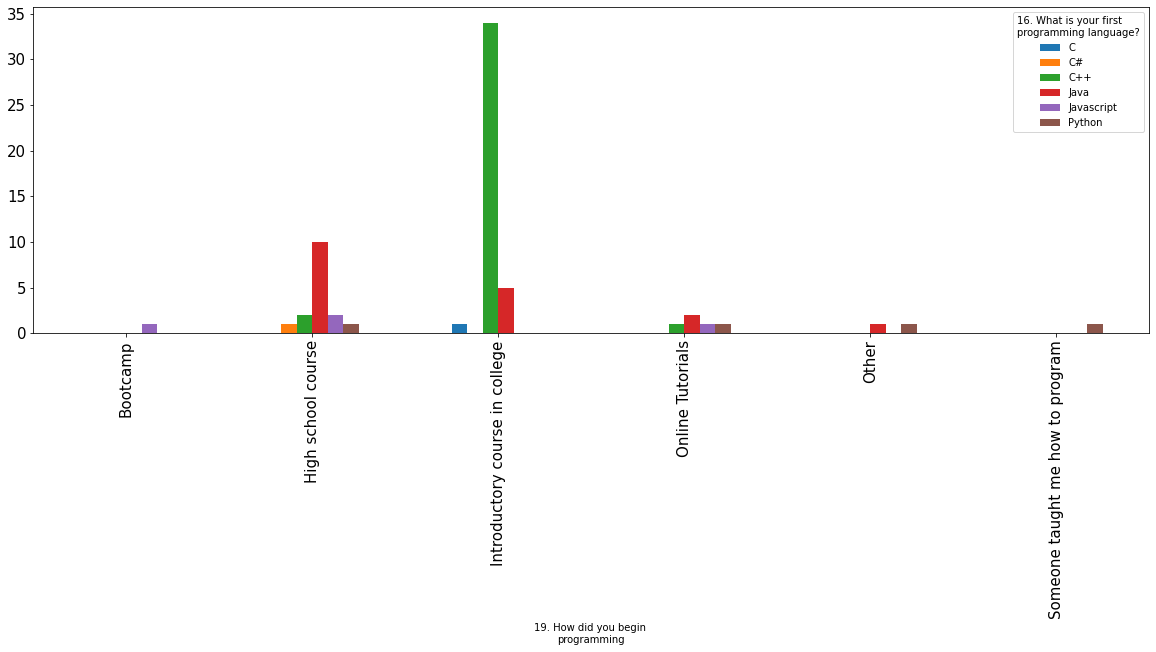

In [2]:
t1 = pd.crosstab(df2["19. How did you begin \nprogramming"], df2["16. What is your first \nprogramming language?"])
t1.plot.bar(figsize = (20,6), fontsize = 15)

### 2. correlation between liking working out and the amount of times a week someone works out
we are finding the percentage of student that work out for x amount of days based on whether they said they enjoyed playing sports or working out

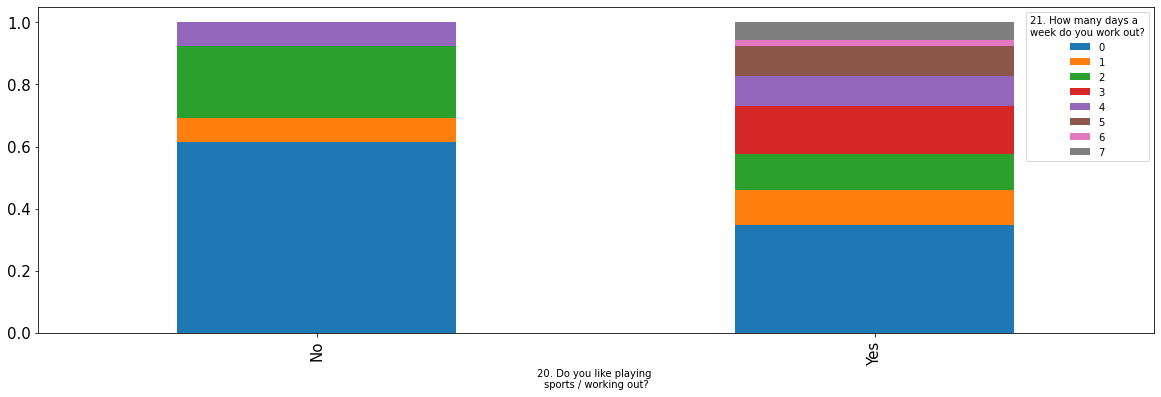

In [3]:
t2 = pd.crosstab(df2["20. Do you like playing \nsports / working out?"], df2["21. How many days a \nweek do you work out?"], normalize='index')
t2.plot.bar(stacked = True, figsize = (20,6), fontsize = 15)

### 3. correlation between familiarity with python and anaconda
we are using a heat map to determine the correlations between python familiarity and anaconda familiarity

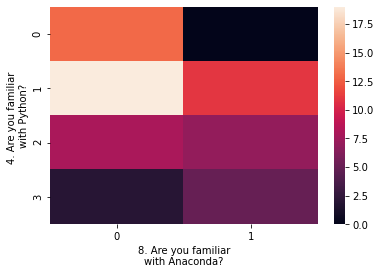

In [4]:
t3 = pd.crosstab(df2["4. Are you familiar \nwith Python?"], df2["8. Are you familiar\nwith Anaconda?"])
sns.heatmap(t3)

### 4. average familiarity with statistical tests
we are looking at the raw data of familiarity with statistical tests and then finding the mean

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000248F40E99D0>]],
      dtype=object)

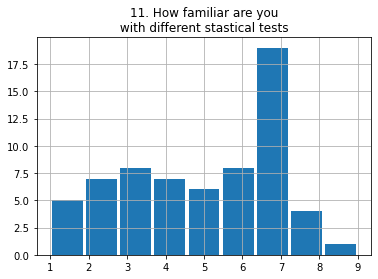

In [5]:
df2.hist(column="11. How familiar are you\n with different stastical tests ", bins=9, rwidth = 0.9)

In [6]:
df2["11. How familiar are you\n with different stastical tests "].mean()

4.969230769230769

### 5. most common preferred music type
we are looking at the raw data of preferred music type tests and then finding the mean

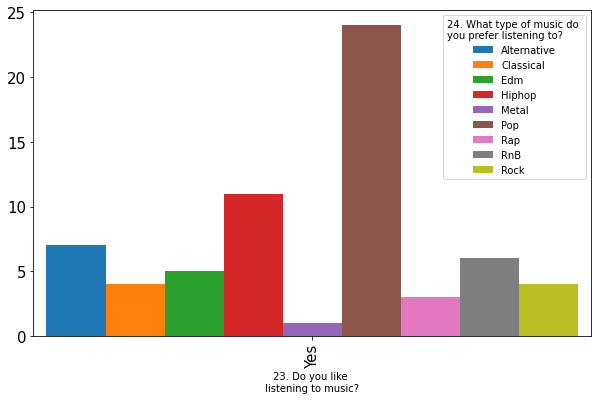

In [7]:
t4 = pd.crosstab(df2["23. Do you like \nlistening to music?"], df2["24. What type of music do \nyou prefer listening to?"])
t4.plot.bar(figsize = (10,6), width = 10, fontsize = 15)

### 6. what are the mean, median and mode on how many technical electives are taken
we are looking at the raw data of preferred music type tests and then finding the mean, median, and mode

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000248F452F4C0>]],
      dtype=object)

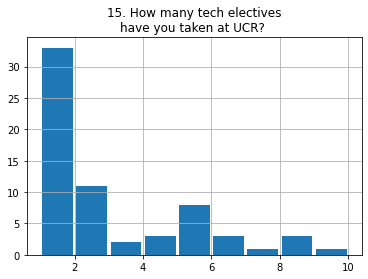

In [8]:
df2.hist(column = "15. How many tech electives\nhave you taken at UCR? ", bins=9, rwidth = 0.9)

In [9]:
print("mean:", df2["15. How many tech electives\nhave you taken at UCR? "].mean())
print("median:", df2["15. How many tech electives\nhave you taken at UCR? "].median())
print("mode:", df2["15. How many tech electives\nhave you taken at UCR? "].mode()[0])

mean: 2.646153846153846
median: 1.0
mode: 1


## Q4: Can you state any hypotheses or make some predictions? Which tests can you apply to verify your hypothesis?
### 1. correlation between first programming language and how they started
**hypothesis:** students who started learning programming at college are likely to have c++ as their first programming language compared to other students

**tests:** condition probability -- P( C++ | college )

### 2. correlation between liking working out and the amount of times a week someone works out
**hypothesis:**
- null hypothesis: people's affinity to sports and working out does not affect the frequency they work out
- alternatice hypothesis: people's affinity to sports and working out does affect the frequency they work out

**tests:** x2 test

### 6. what are the mean, median and mode on how many technical electives are taken
**hypothesis:**
- the mean will be around 3.5, assuming we round the average
- the median will be 3
- the mode will be 2

**tests:** mean, median, mode

## Q5: Test your hypotheses

In [10]:
# functions

# based on https://github.com/kuldeepnpatel/Chi-Square-Test-of-Independence/blob/master/Chi-Square%20Test%20of%20Independence.ipynb
def chi_squared_test(df_1, alpha):
    # observed
    observed = df_1.values

    # expected
    b = stats.chi2_contingency(observed)
    expected = b[3]
    expected_rounded = np.round(expected, 2)

    # degrees of freedom, deg_free
    deg_free = b[2]

    # significance level, passed in function call

    #chi-square statistic - x2_stat
    x2 = sum( ((o-e)**2./e for o,e in zip(observed, expected)) )
    x2_stat = np.sum(x2)

    # critical value
    critical_value = chi2.ppf(1-alpha, deg_free)
    critical_value = np.round(critical_value, 2)

    # p value
    p_value = 1 - chi2.cdf(x2_stat, deg_free)

    # summary
    return alpha, deg_free, x2_stat, critical_value, p_value

### 1. correlation between first programming language and how they started
we are using conditional probability to test our hypothesis

testing by hand
![](q1.jpg)

based on the performance of the test below, we can conclude that our hypothesis is true since the percentage of students who started learning programming at college that have their first programming language to be c++ is larger than 90% and any other percentage of students who started learning programming at college and their first programming language that is not c++ will be less than

In [11]:
# verify test
toyset_q1 = df2[["19. How did you begin \nprogramming", "16. What is your first \nprogramming language?"]]
toyset_q1 = toyset_q1[0:3]
t5 = pd.crosstab(toyset_q1["19. How did you begin \nprogramming"], toyset_q1["16. What is your first \nprogramming language?"])
t5 = t5.T

print("toyset_q1 test")
print("--------------")
print("P( C++ | college ):", t5.loc["C++", "Introductory course in college"] / t5["Introductory course in college"].sum() == 0.5)

toyset_q1 test
--------------
P( C++ | college ): True


In [12]:
# perform test
t1 = t1.T
print("P( C++ | college ):", t1.loc["C++", "Introductory course in college"] / t1["Introductory course in college"].sum())

P( C++ | college ): 0.85


### 2. correlation between liking working out and the amount of times a week someone works out
we are using chi squared test to test our hypothesis with an alpha (significance level) of 0.05

testing by hand
![](q2.jpg)

based on the results below, we can accept the null hypothesis. this means that there is no significant relationship between liking working out and the amount of times in a week that a person works out. this means that a student in the class may or may not work out (at various frequencies) regardless of their enjoyment of sports or working out.

In [13]:
# verify test
toyset_q2 = df2[["20. Do you like playing \nsports / working out?", "21. How many days a \nweek do you work out?"]]
toyset_q2 = toyset_q2[0:3]
t6 = pd.crosstab(toyset_q2["20. Do you like playing \nsports / working out?"], toyset_q2["21. How many days a \nweek do you work out?"])

print("toyset_q2 test")
print("--------------")
alpha, deg_free, x2_stat, critical_value, p_value = chi_squared_test(t6, 0.05)

print('significance level:\t', alpha == 0.05)
print('degrees of freedom:\t', deg_free == 1)
print('chi-square statistic:\t', x2_stat == 0.75)
print('critical_value:\t\t', critical_value == 3.84)

if x2_stat >= critical_value:
    print("reject null hypothesis, there is a relationship between 2 categorical variables")
else:
    print("accept null hypothesis, there is no relationship between 2 categorical variables")

toyset_q2 test
--------------
significance level:	 True
degrees of freedom:	 True
chi-square statistic:	 True
critical_value:		 True
accept null hypothesis, there is no relationship between 2 categorical variables


In [14]:
# perform test
t2 = pd.crosstab(df2["20. Do you like playing \nsports / working out?"], df2["21. How many days a \nweek do you work out?"])
alpha, deg_free, x2_stat, critical_value, p_value = chi_squared_test(t2, 0.05)

print('significance level:\t', alpha)
print('degrees of freedom:\t', deg_free)
print('chi-square statistic:\t', x2_stat)
print('critical_value:\t\t', critical_value)

if x2_stat >= critical_value:
    print("reject null hypothesis, there is a relationship between 2 categorical variables")
else:
    print("accept null hypothesis, there is no relationship between 2 categorical variables")

significance level:	 0.05
degrees of freedom:	 7
chi-square statistic:	 7.319139194139194
critical_value:		 14.07
accept null hypothesis, there is no relationship between 2 categorical variables


### 6. what are the mean, median and mode on how many technical electives are taken
we are using the mean, median and mode to test our hypothesis

testing by hand
![](q6.jpg)

based on the results below, all of our predictions were incorrect. most students have taken 1 elective class at ucr. however, the mean in close to 2.5 (rounded). this indicated that while the majority of students have taken only 1 elective class, there are enough students that have taken more than 3 classes to have a significant sway on the results

In [15]:
# verify test
toyset_q6 = df2["15. How many tech electives\nhave you taken at UCR? "]
toyset_q6 = toyset_q6[1:4]

print("toyset_q6 test")
print("--------------")
print("mean:\t", toyset_q6.mean() == (5/3))
print("median:\t", toyset_q6.median() == 1)
print("mode:\t", toyset_q6.mode()[0] == 1)

toyset_q6 test
--------------
mean:	 True
median:	 True
mode:	 True


In [16]:
# perform test
print("mean:\t", df2["15. How many tech electives\nhave you taken at UCR? "].mean())
print("median:\t", df2["15. How many tech electives\nhave you taken at UCR? "].median())
print("mode:\t", df2["15. How many tech electives\nhave you taken at UCR? "].mode()[0])

mean:	 2.646153846153846
median:	 1.0
mode:	 1
